In [1]:
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
df = pd.read_excel('NASDAQ Realized Volatility.xlsx',index_col='Date',parse_dates=True)


In [3]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
epochs = [12,12,12,13,14,15]
RMSE = []
Accuracy = []
scaler = MinMaxScaler()

21 lags

In [4]:
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[0]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[0], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[0])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/12
884/884 [==============================] - 6s 4ms/step - loss: 0.3287 - accuracy: 0.0011 - mean_absolute_error: 0.3058
Epoch 2/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0323 - accuracy: 0.0011 - mean_absolute_error: 0.1093
Epoch 3/12
884/884 [==============================] - 3s 4ms/step - loss: 0.0218 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0826
Epoch 4/12
884/884 [==============================] - 3s 4ms/step - loss: 0.0121 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0683
Epoch 5/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0099 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0609
Epoch 6/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0090 - accuracy: 0.0011 - mean_absolute_error: 0.0587
Epoch 7/12
884/884 [==============================] - 6s 7ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0578
Epoch 8/12
884/884 [==============================] - 7s 7ms/step - loss: 

884/884 [==============================] - 8s 10ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0518
Epoch 12/12
1/1 [==============================] - 0s 30ms/step
Epoch 1/12
884/884 [==============================] - 10s 5ms/step - loss: 0.1617 - accuracy: 0.0000e+00 - mean_absolute_error: 0.2206
Epoch 2/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0180 - accuracy: 0.0011 - mean_absolute_error: 0.0802
Epoch 3/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0133 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0678
Epoch 4/12
884/884 [==============================] - 5s 6ms/step - loss: 0.0089 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0596
Epoch 5/12
884/884 [==============================] - 5s 5ms/step - loss: 0.0078 - accuracy: 0.0011 - mean_absolute_error: 0.0579
Epoch 6/12
884/884 [==============================] - 9s 10ms/step - loss: 0.0091 - accuracy: 0.0011 - mean_absolute_error: 0.0583
Epoch 7/12
884/884

1/1 [==============================] - 0s 30ms/step
Epoch 1/12
884/884 [==============================] - 8s 5ms/step - loss: 0.1804 - accuracy: 0.0011 - mean_absolute_error: 0.2356
Epoch 2/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0200 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0840
Epoch 3/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0110 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0640
Epoch 4/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0102 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0603
Epoch 5/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0076 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0574
Epoch 6/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0536
Epoch 7/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0076 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0548
Epoch 8/12
884

1/1 [==============================] - 0s 25ms/step
Epoch 1/12
884/884 [==============================] - 8s 5ms/step - loss: 0.1682 - accuracy: 0.0000e+00 - mean_absolute_error: 0.2287
Epoch 2/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0206 - accuracy: 0.0011 - mean_absolute_error: 0.0876
Epoch 3/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0163 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0707
Epoch 4/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0555
Epoch 5/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0534
Epoch 6/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0549
Epoch 7/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0066 - accuracy: 0.0011 - mean_absolute_error: 0.0525
Epoch 8/12
884/884

1/1 [==============================] - 0s 27ms/step


In [5]:
Accuracy

[45.0095191077297,
 46.139790034973394,
 36.78164036523952,
 34.60569878193087,
 28.34868111296457]

In [20]:
RMSE

[0.0030101236821353035,
 0.003036514903659378,
 0.003309434844365814,
 0.003414382846433105,
 0.00369386198369264]

In [19]:
np.mean(RMSE)

0.0032928636520572476

In [37]:
np.std([0.0030101236821353035,
 0.003036514903659378,
 0.003309434844365814,
 0.003414382846433105,
 0.00369386198369264])

0.00025357356028863465

63 lags

In [14]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[1]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[1], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[1])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/12
842/842 [==============================] - 16s 12ms/step - loss: 0.6497 - accuracy: 0.0012 - mean_absolute_error: 0.3879
Epoch 2/12
842/842 [==============================] - 12s 14ms/step - loss: 0.0853 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1567
Epoch 3/12
842/842 [==============================] - 7s 9ms/step - loss: 0.0305 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1011
Epoch 4/12
842/842 [==============================] - 7s 9ms/step - loss: 0.0145 - accuracy: 0.0012 - mean_absolute_error: 0.0762
Epoch 5/12
842/842 [==============================] - 9s 11ms/step - loss: 0.0097 - accuracy: 0.0012 - mean_absolute_error: 0.0639
Epoch 6/12
842/842 [==============================] - 10s 12ms/step - loss: 0.0097 - accuracy: 0.0012 - mean_absolute_error: 0.0623
Epoch 7/12
842/842 [==============================] - 8s 10ms/step - loss: 0.0137 - accuracy: 0.0012 - mean_absolute_error: 0.0701
Epoch 8/12
842/842 [==============================] - 10s 12ms/step - loss

842/842 [==============================] - 7s 8ms/step - loss: 0.0102 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0572
Epoch 12/12
1/1 [==============================] - 0s 32ms/step
Epoch 1/12
842/842 [==============================] - 13s 8ms/step - loss: 0.3941 - accuracy: 0.0012 - mean_absolute_error: 0.3263
Epoch 2/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0513 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1250
Epoch 3/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0171 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0790
Epoch 4/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0093 - accuracy: 0.0012 - mean_absolute_error: 0.0638
Epoch 5/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0129 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0688
Epoch 6/12
842/842 [==============================] - 6s 7ms/step - loss: 0.0091 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0595
Epoch 7/12
842/8

1/1 [==============================] - 0s 25ms/step
Epoch 1/12
842/842 [==============================] - 9s 7ms/step - loss: 0.4232 - accuracy: 0.0000e+00 - mean_absolute_error: 0.3549
Epoch 2/12
842/842 [==============================] - 6s 7ms/step - loss: 0.0340 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1112
Epoch 3/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0181 - accuracy: 0.0012 - mean_absolute_error: 0.0784
Epoch 4/12
842/842 [==============================] - 6s 7ms/step - loss: 0.0117 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0675
Epoch 5/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0098 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0640
Epoch 6/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0100 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0641
Epoch 7/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0100 - accuracy: 0.0012 - mean_absolute_error: 0.0607
Epoch 8/12
842/842

1/1 [==============================] - 0s 26ms/step
Epoch 1/12
842/842 [==============================] - 12s 8ms/step - loss: 1.2974 - accuracy: 0.0000e+00 - mean_absolute_error: 0.5158
Epoch 2/12
842/842 [==============================] - 7s 9ms/step - loss: 0.0971 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1532
Epoch 3/12
842/842 [==============================] - 7s 9ms/step - loss: 0.0586 - accuracy: 0.0012 - mean_absolute_error: 0.1251
Epoch 4/12
842/842 [==============================] - 7s 9ms/step - loss: 0.0409 - accuracy: 0.0012 - mean_absolute_error: 0.1040
Epoch 5/12
842/842 [==============================] - 9s 11ms/step - loss: 0.0141 - accuracy: 0.0012 - mean_absolute_error: 0.0716
Epoch 6/12
842/842 [==============================] - 8s 10ms/step - loss: 0.0157 - accuracy: 0.0012 - mean_absolute_error: 0.0703
Epoch 7/12
842/842 [==============================] - 7s 9ms/step - loss: 0.0133 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0672
Epoch 8/12
842/842 [===

1/1 [==============================] - 0s 61ms/step


In [15]:
Accuracy

[48.64975901209525,
 28.470224513299634,
 24.935724881677366,
 25.29198675541444,
 10.169064191760146]

In [16]:
RMSE

[0.002866869745511757,
 0.00377727562785561,
 0.003924846536239526,
 0.00393522242595282,
 0.004590542042044011]

In [17]:
np.mean(RMSE)

0.003818951275520745

In [38]:
np.std([0.002866869745511757,
 0.00377727562785561,
 0.003924846536239526,
 0.00393522242595282,
 0.004590542042044011])

0.0005528618628630523

84 lags

In [21]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[2]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[2], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[2])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/12
821/821 [==============================] - 17s 12ms/step - loss: 1.2451 - accuracy: 0.0012 - mean_absolute_error: 0.4917
Epoch 2/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0824 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1858
Epoch 3/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1350
Epoch 4/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0983
Epoch 5/12
821/821 [==============================] - 8s 9ms/step - loss: 0.0197 - accuracy: 0.0012 - mean_absolute_error: 0.0849
Epoch 6/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0123 - accuracy: 0.0012 - mean_absolute_error: 0.0706
Epoch 7/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0092 - accuracy: 0.0012 - mean_absolute_error: 0.0617
Epoch 8/12
821/821 [==============================] - 7s 9ms/step - loss: 0.

821/821 [==============================] - 15s 18ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0535
Epoch 12/12
1/1 [==============================] - 0s 30ms/step
Epoch 1/12
821/821 [==============================] - 13s 10ms/step - loss: 0.4555 - accuracy: 0.0012 - mean_absolute_error: 0.3595
Epoch 2/12
821/821 [==============================] - 10s 12ms/step - loss: 0.0766 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1429
Epoch 3/12
821/821 [==============================] - 9s 11ms/step - loss: 0.0168 - accuracy: 0.0012 - mean_absolute_error: 0.0819
Epoch 4/12
821/821 [==============================] - 8s 10ms/step - loss: 0.0132 - accuracy: 0.0012 - mean_absolute_error: 0.0716
Epoch 5/12
821/821 [==============================] - 8s 10ms/step - loss: 0.0116 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0670
Epoch 6/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0104 - accuracy: 0.0012 - mean_absolute_error: 0.0645
Epoch 7/12
821/8

1/1 [==============================] - 0s 34ms/step
Epoch 1/12
821/821 [==============================] - 16s 11ms/step - loss: 0.3406 - accuracy: 0.0000e+00 - mean_absolute_error: 0.3297
Epoch 2/12
821/821 [==============================] - 9s 11ms/step - loss: 0.0357 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1112
Epoch 3/12
821/821 [==============================] - 11s 13ms/step - loss: 0.0186 - accuracy: 0.0012 - mean_absolute_error: 0.0799
Epoch 4/12
821/821 [==============================] - 7s 8ms/step - loss: 0.0101 - accuracy: 0.0012 - mean_absolute_error: 0.0618
Epoch 5/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0105 - accuracy: 0.0012 - mean_absolute_error: 0.0617
Epoch 6/12
821/821 [==============================] - 7s 8ms/step - loss: 0.0083 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0554
Epoch 7/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0064 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0527
Epoch 8/12
821/82

1/1 [==============================] - 0s 46ms/step
Epoch 1/12
821/821 [==============================] - 15s 10ms/step - loss: 0.2431 - accuracy: 0.0012 - mean_absolute_error: 0.3023
Epoch 2/12
821/821 [==============================] - 9s 10ms/step - loss: 0.0224 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1003
Epoch 3/12
821/821 [==============================] - 6s 8ms/step - loss: 0.0120 - accuracy: 0.0012 - mean_absolute_error: 0.0733
Epoch 4/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0090 - accuracy: 0.0012 - mean_absolute_error: 0.0607
Epoch 5/12
821/821 [==============================] - 6s 8ms/step - loss: 0.0069 - accuracy: 0.0012 - mean_absolute_error: 0.0562
Epoch 6/12
821/821 [==============================] - 6s 8ms/step - loss: 0.0094 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0603
Epoch 7/12
821/821 [==============================] - 6s 8ms/step - loss: 0.0081 - accuracy: 0.0012 - mean_absolute_error: 0.0579
Epoch 8/12
821/821 [=======

1/1 [==============================] - 0s 25ms/step


In [22]:
Accuracy

[33.88576490191606,
 39.823737282274905,
 42.102896622261895,
 37.96677671866768,
 36.756078146835314]

In [23]:
RMSE

[0.003407193818049874,
 0.003169663961243384,
 0.0031218940311341873,
 0.003308958058621043,
 0.003303307963417087]

In [24]:
np.mean(RMSE)

0.0032622035664931154

In [39]:
np.std([0.003407193818049874,
 0.003169663961243384,
 0.0031218940311341873,
 0.003308958058621043,
 0.003303307963417087])

0.0001031000206396977

126 lags

In [25]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[3]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[3], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[3])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/13
779/779 [==============================] - 16s 13ms/step - loss: 1.3877 - accuracy: 0.0000e+00 - mean_absolute_error: 0.6147
Epoch 2/13
779/779 [==============================] - 11s 14ms/step - loss: 0.1228 - accuracy: 0.0013 - mean_absolute_error: 0.2151
Epoch 3/13
779/779 [==============================] - 11s 14ms/step - loss: 0.0464 - accuracy: 0.0013 - mean_absolute_error: 0.1393
Epoch 4/13
779/779 [==============================] - 10s 13ms/step - loss: 0.0349 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1146
Epoch 5/13
779/779 [==============================] - 10s 13ms/step - loss: 0.0253 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0969
Epoch 6/13
779/779 [==============================] - 10s 13ms/step - loss: 0.0285 - accuracy: 0.0013 - mean_absolute_error: 0.0952
Epoch 7/13
779/779 [==============================] - 10s 13ms/step - loss: 0.0170 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0761
Epoch 8/13
779/779 [==============================] - 10s 13

779/779 [==============================] - 16s 21ms/step - loss: 0.0069 - accuracy: 0.0013 - mean_absolute_error: 0.0541
Epoch 11/13
779/779 [==============================] - 15s 19ms/step - loss: 0.0105 - accuracy: 0.0013 - mean_absolute_error: 0.0635
Epoch 12/13
779/779 [==============================] - 15s 19ms/step - loss: 0.0083 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0574
Epoch 13/13
1/1 [==============================] - 0s 30ms/step
Epoch 1/13
779/779 [==============================] - 19s 16ms/step - loss: 2.3138 - accuracy: 0.0000e+00 - mean_absolute_error: 0.7492
Epoch 2/13
779/779 [==============================] - 11s 14ms/step - loss: 0.1468 - accuracy: 0.0013 - mean_absolute_error: 0.2370
Epoch 3/13
779/779 [==============================] - 13s 17ms/step - loss: 0.0831 - accuracy: 0.0013 - mean_absolute_error: 0.1830
Epoch 4/13
779/779 [==============================] - 13s 16ms/step - loss: 0.0412 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1226
Epoch 5/1

1/1 [==============================] - 0s 24ms/step
Epoch 1/13
779/779 [==============================] - 15s 14ms/step - loss: 2.2070 - accuracy: 0.0013 - mean_absolute_error: 0.6647
Epoch 2/13
779/779 [==============================] - 14s 18ms/step - loss: 0.1242 - accuracy: 0.0000e+00 - mean_absolute_error: 0.2209
Epoch 3/13
779/779 [==============================] - 13s 16ms/step - loss: 0.0738 - accuracy: 0.0013 - mean_absolute_error: 0.1611
Epoch 4/13
779/779 [==============================] - 10s 13ms/step - loss: 0.0431 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1220
Epoch 5/13
779/779 [==============================] - 10s 13ms/step - loss: 0.0242 - accuracy: 0.0013 - mean_absolute_error: 0.0952
Epoch 6/13
779/779 [==============================] - 10s 13ms/step - loss: 0.0147 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0749
Epoch 7/13
779/779 [==============================] - 14s 18ms/step - loss: 0.0166 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0785
Epoch 8/

1/1 [==============================] - 0s 29ms/step
Epoch 1/13
779/779 [==============================] - 17s 14ms/step - loss: 1.7517 - accuracy: 0.0013 - mean_absolute_error: 0.6569
Epoch 2/13
779/779 [==============================] - 11s 14ms/step - loss: 0.0946 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1981
Epoch 3/13
779/779 [==============================] - 11s 14ms/step - loss: 0.0523 - accuracy: 0.0013 - mean_absolute_error: 0.1551
Epoch 4/13
779/779 [==============================] - 11s 14ms/step - loss: 0.0395 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1159
Epoch 5/13
779/779 [==============================] - 11s 14ms/step - loss: 0.0281 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1005
Epoch 6/13
779/779 [==============================] - 11s 14ms/step - loss: 0.0227 - accuracy: 0.0013 - mean_absolute_error: 0.0898
Epoch 7/13
779/779 [==============================] - 11s 14ms/step - loss: 0.0161 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0761
Epoch 8/

1/1 [==============================] - 0s 47ms/step


In [26]:
Accuracy

[27.698100553239623,
 33.93614320929685,
 50.63445251422092,
 53.03580031131986,
 34.10021321962115]

In [27]:
RMSE

[0.0038337700050083924,
 0.0034694079090776403,
 0.002809661037980483,
 0.0027250154785492366,
 0.0034005311467421072]

In [28]:
np.mean(RMSE)

0.0032476771154715716

In [40]:
np.std([0.0038337700050083924,
 0.0034694079090776403,
 0.002809661037980483,
 0.0027250154785492366,
 0.0034005311467421072])

0.0004197778092575797

189 lags

In [29]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[4]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[4], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[4])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/14
716/716 [==============================] - 29s 31ms/step - loss: 1.3014 - accuracy: 0.0014 - mean_absolute_error: 0.6117
Epoch 2/14
716/716 [==============================] - 14s 20ms/step - loss: 0.0991 - accuracy: 0.0014 - mean_absolute_error: 0.2013
Epoch 3/14
716/716 [==============================] - 15s 21ms/step - loss: 0.0425 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1415
Epoch 4/14
716/716 [==============================] - 13s 19ms/step - loss: 0.0235 - accuracy: 0.0014 - mean_absolute_error: 0.1047
Epoch 5/14
716/716 [==============================] - 14s 20ms/step - loss: 0.0166 - accuracy: 0.0014 - mean_absolute_error: 0.0851
Epoch 6/14
716/716 [==============================] - 16s 22ms/step - loss: 0.0175 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0825
Epoch 7/14
716/716 [==============================] - 17s 24ms/step - loss: 0.0125 - accuracy: 0.0014 - mean_absolute_error: 0.0713
Epoch 8/14
716/716 [==============================] - 25s 35ms/step 

716/716 [==============================] - 14s 19ms/step - loss: 0.0098 - accuracy: 0.0014 - mean_absolute_error: 0.0589
Epoch 10/14
716/716 [==============================] - 14s 20ms/step - loss: 0.0147 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0695
Epoch 11/14
716/716 [==============================] - 14s 19ms/step - loss: 0.0169 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0731
Epoch 12/14
716/716 [==============================] - 14s 20ms/step - loss: 0.0058 - accuracy: 0.0014 - mean_absolute_error: 0.0530
Epoch 13/14
716/716 [==============================] - 13s 18ms/step - loss: 0.0097 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0597
Epoch 14/14
1/1 [==============================] - 0s 34ms/step
Epoch 1/14
716/716 [==============================] - 26s 27ms/step - loss: 4.8865 - accuracy: 0.0014 - mean_absolute_error: 0.7407
Epoch 2/14
716/716 [==============================] - 18s 25ms/step - loss: 0.2534 - accuracy: 0.0000e+00 - mean_absolute_error: 0.2715
Epo

1/1 [==============================] - 0s 31ms/step
Epoch 1/14
716/716 [==============================] - 23s 25ms/step - loss: 0.8024 - accuracy: 0.0000e+00 - mean_absolute_error: 0.4915
Epoch 2/14
716/716 [==============================] - 19s 26ms/step - loss: 0.1026 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1852
Epoch 3/14
716/716 [==============================] - 18s 25ms/step - loss: 0.0514 - accuracy: 0.0014 - mean_absolute_error: 0.1311
Epoch 4/14
716/716 [==============================] - 13s 19ms/step - loss: 0.0304 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1074
Epoch 5/14
716/716 [==============================] - 18s 26ms/step - loss: 0.0340 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1017
Epoch 6/14
716/716 [==============================] - 13s 19ms/step - loss: 0.0135 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0726
Epoch 7/14
716/716 [==============================] - 14s 19ms/step - loss: 0.0106 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0652


1/1 [==============================] - 0s 33ms/step
Epoch 1/14
716/716 [==============================] - 21s 20ms/step - loss: 2.3617 - accuracy: 0.0014 - mean_absolute_error: 0.7382
Epoch 2/14
716/716 [==============================] - 18s 25ms/step - loss: 0.1185 - accuracy: 0.0014 - mean_absolute_error: 0.2354
Epoch 3/14
716/716 [==============================] - 16s 22ms/step - loss: 0.0736 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1688
Epoch 4/14
716/716 [==============================] - 14s 19ms/step - loss: 0.0405 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1232
Epoch 5/14
716/716 [==============================] - 13s 19ms/step - loss: 0.0309 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1037
Epoch 6/14
716/716 [==============================] - 13s 19ms/step - loss: 0.0269 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0999
Epoch 7/14
716/716 [==============================] - 13s 19ms/step - loss: 0.0259 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0907
Epoc

1/1 [==============================] - 0s 35ms/step


In [30]:
Accuracy

[41.51558094763031,
 51.616656785964366,
 33.5950489050263,
 23.579503040448845,
 39.23260111619451]

In [31]:
RMSE

[0.0031087855203019445,
 0.0027644507488369485,
 0.003406994600208112,
 0.0039638570564878035,
 0.0031828740995467454]

In [32]:
np.mean(RMSE)

0.003285392405076311

In [41]:
np.std([0.0031087855203019445,
 0.0027644507488369485,
 0.003406994600208112,
 0.0039638570564878035,
 0.0031828740995467454])

0.0003970344017839161

252 lags

In [33]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[5]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[5], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[5])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/15
653/653 [==============================] - 24s 27ms/step - loss: 1.8393 - accuracy: 0.0015 - mean_absolute_error: 0.6809
Epoch 2/15
653/653 [==============================] - 13s 20ms/step - loss: 0.1467 - accuracy: 0.0015 - mean_absolute_error: 0.2393
Epoch 3/15
653/653 [==============================] - 14s 21ms/step - loss: 0.0762 - accuracy: 0.0015 - mean_absolute_error: 0.1757
Epoch 4/15
653/653 [==============================] - 13s 20ms/step - loss: 0.0430 - accuracy: 0.0015 - mean_absolute_error: 0.1286
Epoch 5/15
653/653 [==============================] - 14s 21ms/step - loss: 0.0243 - accuracy: 0.0015 - mean_absolute_error: 0.0987
Epoch 6/15
653/653 [==============================] - 15s 23ms/step - loss: 0.0268 - accuracy: 0.0015 - mean_absolute_error: 0.0944
Epoch 7/15
653/653 [==============================] - 15s 23ms/step - loss: 0.0173 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0823
Epoch 8/15
653/653 [==============================] - 15s 23ms/step - lo

653/653 [==============================] - 12s 19ms/step - loss: 0.0143 - accuracy: 0.0015 - mean_absolute_error: 0.0698
Epoch 9/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0115 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0675
Epoch 10/15
653/653 [==============================] - 12s 19ms/step - loss: 0.0138 - accuracy: 0.0015 - mean_absolute_error: 0.0707
Epoch 11/15
653/653 [==============================] - 12s 19ms/step - loss: 0.0128 - accuracy: 0.0015 - mean_absolute_error: 0.0654
Epoch 12/15
653/653 [==============================] - 12s 19ms/step - loss: 0.0080 - accuracy: 0.0015 - mean_absolute_error: 0.0590
Epoch 13/15
653/653 [==============================] - 12s 19ms/step - loss: 0.0075 - accuracy: 0.0015 - mean_absolute_error: 0.0585
Epoch 14/15
653/653 [==============================] - 12s 19ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0576
Epoch 15/15
1/1 [==============================] - 0s 30ms/step
Epoch 1/15

1/1 [==============================] - 0s 35ms/step
Epoch 1/15
653/653 [==============================] - 18s 19ms/step - loss: 1.1872 - accuracy: 0.0000e+00 - mean_absolute_error: 0.5983
Epoch 2/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0886 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1791
Epoch 3/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0415 - accuracy: 0.0015 - mean_absolute_error: 0.1204
Epoch 4/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0238 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0971
Epoch 5/15
653/653 [==============================] - 13s 20ms/step - loss: 0.0286 - accuracy: 0.0015 - mean_absolute_error: 0.0965
Epoch 6/15
653/653 [==============================] - 13s 20ms/step - loss: 0.0211 - accuracy: 0.0015 - mean_absolute_error: 0.0821
Epoch 7/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0157 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0736
Epoch 8/

1/1 [==============================] - 0s 28ms/step
Epoch 1/15
653/653 [==============================] - 17s 19ms/step - loss: 1.8020 - accuracy: 0.0000e+00 - mean_absolute_error: 0.6803
Epoch 2/15
653/653 [==============================] - 12s 19ms/step - loss: 0.1077 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1946
Epoch 3/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0656 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1485
Epoch 4/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0279 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1049
Epoch 5/15
653/653 [==============================] - 12s 19ms/step - loss: 0.0205 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0925
Epoch 6/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0156 - accuracy: 0.0015 - mean_absolute_error: 0.0783
Epoch 7/15
653/653 [==============================] - 13s 20ms/step - loss: 0.0130 - accuracy: 0.0015 - mean_absolute_error: 0.0748
Epoc

1/1 [==============================] - 0s 60ms/step


In [34]:
Accuracy

[57.34079510108927,
 32.342726385109856,
 35.57993637247224,
 53.65832741768407,
 50.680708760585325]

In [35]:
RMSE

[0.0026121923540658293,
 0.0035200173707812176,
 0.0033604237867962566,
 0.0026608328222594685,
 0.0027819374689120337]

In [36]:
np.mean(RMSE)

0.002987080760562961

In [42]:
np.std(RMSE)

0.000377483575915715

84 lags was chosen

In [43]:
Accuracy=[]
RMSE=[]

In [91]:
train = df.iloc[:1005]
test = df.iloc[1005:]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:1005]
test = df["Realised"].iloc[1005:]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 4
n_input = n_inputs[2]
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
model = Sequential()
model.add(TCN(kernel_size=3, dilations=dilations[2], nb_stacks=1,padding='causal',
              dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=epochs[2])
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(scaled_test_input)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-(np.sum(np.sqrt((test-true_predictions)**2)/test)/len(test)))*100)

Epoch 1/12
921/921 [==============================] - 26s 20ms/step - loss: 0.4955 - accuracy: 0.0011 - mean_absolute_error: 0.3647
Epoch 2/12
921/921 [==============================] - 18s 19ms/step - loss: 0.0582 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1387
Epoch 3/12
921/921 [==============================] - 17s 18ms/step - loss: 0.0238 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0926
Epoch 4/12
921/921 [==============================] - 17s 18ms/step - loss: 0.0123 - accuracy: 0.0011 - mean_absolute_error: 0.0705
Epoch 5/12
921/921 [==============================] - 17s 18ms/step - loss: 0.0080 - accuracy: 0.0011 - mean_absolute_error: 0.0595
Epoch 6/12
921/921 [==============================] - 18s 19ms/step - loss: 0.0100 - accuracy: 0.0011 - mean_absolute_error: 0.0605
Epoch 7/12
921/921 [==============================] - 17s 19ms/step - loss: 0.0072 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0528
Epoch 8/12
921/921 [==============================] - 17s 18ms/s

1/1 [==============================] - 0s 36ms/step


In [92]:
Accuracy

[70.21320054298714,
 69.78817870085483,
 67.64910420511296,
 67.12990979252842,
 70.51819108566323,
 70.76298126444792,
 68.4795614926026,
 65.80065828811318,
 67.97110909326408,
 67.30201141878582,
 68.38943042617137,
 68.88826803364584,
 70.30408960368058,
 68.46535535765048,
 70.17188181487455]

Text(0, 0.5, 'NASDAQ Realized Volatility')

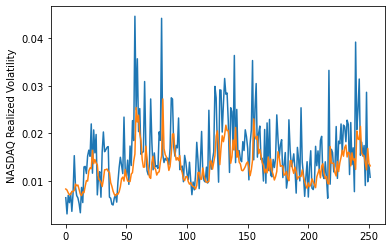

In [64]:
plt.plot(range(252), test)
plt.plot(range(252), true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

In [94]:
print("mean: %s" %(round(np.mean(Accuracy),2))+"%")

mean: 68.79%


In [95]:
print("stdv: %s" %(round(np.std(Accuracy),2))+"%")

stdv: 1.42%


In [96]:
Accuracy_CI_95_lower_bound=np.mean(Accuracy)-2*np.std(Accuracy)
Accuracy_CI_95_upper_bound=np.mean(Accuracy)+2*np.std(Accuracy)
print("95 percent CI lower bound: %s" %round(Accuracy_CI_95_lower_bound,2)+"%")
print("95 percent CI upper bound: %s" %round(Accuracy_CI_95_upper_bound,2)+"%")

95 percent CI lower bound: 65.94%
95 percent CI upper bound: 71.63%


In [97]:
Accuracy_CI_99_lower_bound=np.mean(Accuracy)-3*np.std(Accuracy)
Accuracy_CI_99_upper_bound=np.mean(Accuracy)+3*np.std(Accuracy)
print("99.7 percent CI lower bound: %s" %round(Accuracy_CI_99_lower_bound,2)+"%")
print("99.7 percent CI upper bound: %s" %round(Accuracy_CI_99_upper_bound,2)+"%")

99.7 percent CI lower bound: 64.52%
99.7 percent CI upper bound: 73.06%


In [98]:
RMSE

[0.0050739174262251115,
 0.004637515394117647,
 0.005589206857452534,
 0.004743345728707273,
 0.005114208443596794,
 0.004834914847510015,
 0.004931492070492175,
 0.005999958727340028,
 0.005240983382367055,
 0.004956401881656106,
 0.005323714340843192,
 0.005193103695403207,
 0.004963648696312832,
 0.005405583844196069,
 0.00508224822624215]

In [99]:
print("mean: %s" %(round(np.mean(RMSE),5)*100)+"%")

mean: 0.514%


In [100]:
print("stdv: %s" %(round(np.std(RMSE),5)*100)+"%")

stdv: 0.033%


In [101]:
RMSE_CI_95_lower_bound=np.mean(RMSE)-2*np.std(RMSE)
RMSE_CI_95_upper_bound=np.mean(RMSE)+2*np.std(RMSE)
print("95 percent CI lower bound: %s" %(round(RMSE_CI_95_lower_bound,5)*100)+"%")
print("95 percent CI upper bound: %s" %(round(RMSE_CI_95_upper_bound,5)*100)+"%")

95 percent CI lower bound: 0.447%
95 percent CI upper bound: 0.581%


In [102]:
RMSE_CI_99_lower_bound=np.mean(RMSE)-3*np.std(RMSE)
RMSE_CI_99_upper_bound=np.mean(RMSE)+3*np.std(RMSE)
print("99.7 percent CI lower bound: %s" %(round(RMSE_CI_99_lower_bound,5)*100)+"%")
print("99.7 percent CI upper bound: %s" %(round(RMSE_CI_99_upper_bound,5)*100)+"%")

99.7 percent CI lower bound: 0.414%
99.7 percent CI upper bound: 0.614%
